In [3]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import streamlit
import warnings
warnings.filterwarnings('ignore')
# Import label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

In [4]:
# 1. Data Collection 
df = pd.read_csv('Data.csv')
df.head(10)
print("Shape of the dataset:", df.shape)

Shape of the dataset: (2000, 2)


In [5]:
df.sample(5)

,Comments,Classes
1263,your a gay cunt Mikee,B
1706,"I'm not afraid to hit a girl. In fact, I plan ...",B
73,Are you sitting down Ok Ready for this is offi...,NB
797,she is so beautiful hope you are ok qq,NB
580,Lick it now like it good like this pussy just ...,B


In [6]:
# Check for duplicated comments and remove them
duplicated_comments = df.duplicated(subset=['Comments'])
print("Total number of duplicated comments:", sum(duplicated_comments))
print("Duplicated Comments in the dataset:")
df[duplicated_comments]
reviews_data_non_duplicated = df.drop_duplicates(subset=['Comments'], keep='first')
print("Shape of reviews_data_non_duplicated:", reviews_data_non_duplicated.shape)

print("Number of Null/NaN values in dataset column:")
reviews_data_cleaned = reviews_data_non_duplicated.dropna()

Total number of duplicated comments: 9
Duplicated Comments in the dataset:
Shape of reviews_data_non_duplicated: (1991, 2)
Number of Null/NaN values in dataset column:


In [7]:
def remove_punctuation(txt):
    txt_nopunct = "".join([char for char in txt if char not in string.punctuation])
    return txt_nopunct

reviews_data_cleaned['Comments'] = reviews_data_cleaned['Comments'].apply(lambda x: remove_punctuation(x))

def remove_digits(txt):
    txt_nodigit = "".join([char for char in txt if not char.isdigit()])
    return txt_nodigit

reviews_data_cleaned['Comments'] = reviews_data_cleaned['Comments'].apply(lambda x: remove_digits(x))

reviews_data_cleaned['Comments'] = reviews_data_cleaned['Comments'].str.lower()

print("Unique values in 'Classes' column:", reviews_data_cleaned['Classes'].unique())

classes_labels = {'NB': 0, 'B': 1}

reviews_data_cleaned['Classes_Labels'] = reviews_data_cleaned['Classes'].map(classes_labels)

user_reviews = reviews_data_cleaned['Comments']
reviews_classes = reviews_data_cleaned[['Classes_Labels']]

print("First Five user_reviews:\n", user_reviews.head(), "\n")
print("First Five reviews_classes:\n", reviews_classes.head())

print("Shape of the user_reviews:", user_reviews.shape)
print("Shape of the reviews_classes:", reviews_classes.shape)


Unique values in 'Classes' column: ['NB' 'B']
First Five user_reviews:
 0    a commodity we trade is beet pulp so i asked a...
2    a never opens all the way until he she is comp...
3    a porn star who thinks she is better than an e...
4    about and how sweet she is to every single per...
5    about and how sweet she is to every single per...
Name: Comments, dtype: object 

First Five reviews_classes:
    Classes_Labels
0               0
2               0
3               0
4               0
5               0
Shape of the user_reviews: (1982,)
Shape of the reviews_classes: (1982, 1)


In [8]:
train_review, test_review, train_label, test_label = train_test_split(user_reviews, reviews_classes, 
                                                                      test_size=0.30, 
                                                                      random_state=42)


In [9]:
print("Shape of train_review and train_label:", train_review.shape, train_label.shape)
print("Shape of test_review and test_label:", test_review.shape, test_label.shape)

print("First five train reviews and their labels:")
print(train_review[:5])
print(train_label[:5])

tfidf_vectorizer = TfidfVectorizer()

train_review_vectors = tfidf_vectorizer.fit_transform(train_review)
print("Shape of Train_review_vectors:", train_review_vectors.shape)

test_review_vectors = tfidf_vectorizer.transform(test_review)
print("Shape of test_review_vectors:", test_review_vectors.shape)
#----------------------------------------------------------------------
from sklearn.naive_bayes import MultinomialNB
multi_nb_clf = MultinomialNB()
multi_nb_clf.fit(train_review_vectors, train_label.values.ravel())
predictions_multi_nb_clf = multi_nb_clf.predict(test_review_vectors)

print("Performance Evaluation of Multinomial Naive Bayes (MNB) Algorithm:")
print("Confusion Matrix:\n", confusion_matrix(test_label, predictions_multi_nb_clf))
multi_nb_clf_acc = accuracy_score(test_label, predictions_multi_nb_clf) * 100.0
print("Accuracy:", multi_nb_clf_acc)

print("Classification Report:\n", 
      classification_report(test_label, predictions_multi_nb_clf, target_names=["NB", "B"]))
cm1 = confusion_matrix(test_label, predictions_multi_nb_clf)


Shape of train_review and train_label: (1387,) (1387, 1)
Shape of test_review and test_label: (595,) (595, 1)
First five train reviews and their labels:
287     i was almost giving up but i wont please look ...
1806         sassy girls you arent sassy more like bitchy
723     remember who you are and what she is shes wrot...
1433    every time you text me my cheeks hurt i guess ...
783     she is nearly home one more day and steffy ret...
Name: Comments, dtype: object
      Classes_Labels
287                0
1806               1
723                0
1433               0
783                0
Shape of Train_review_vectors: (1387, 3456)
Shape of test_review_vectors: (595, 3456)
Performance Evaluation of Multinomial Naive Bayes (MNB) Algorithm:
Confusion Matrix:
 [[353   4]
 [105 133]]
Accuracy: 81.68067226890756
Classification Report:
               precision    recall  f1-score   support

          NB       0.77      0.99      0.87       357
           B       0.97      0.56      0.71  

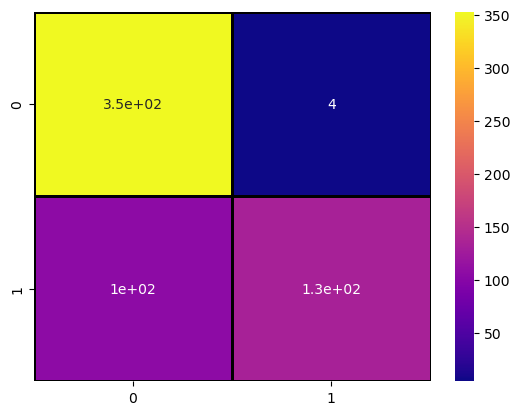

In [10]:
import seaborn as sns

sns.heatmap(cm1, annot=True, cmap='plasma',
            linecolor='black', linewidths=1)
plt.show()

Performance Evaluation of GaussianNB (GNB) Algorithm:
Confusion Matrix:
 [[228 129]
 [ 66 172]]
Accuracy: 67.22689075630252
Classification Report:
               precision    recall  f1-score   support

          NB       0.78      0.64      0.70       357
           B       0.57      0.72      0.64       238

    accuracy                           0.67       595
   macro avg       0.67      0.68      0.67       595
weighted avg       0.69      0.67      0.68       595



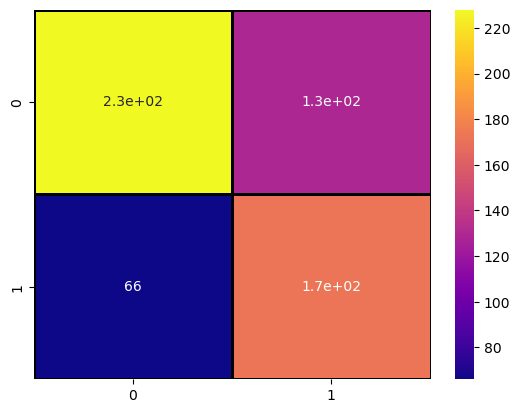

In [11]:
from sklearn.naive_bayes import GaussianNB
gau_nb_clf = GaussianNB()
gau_nb_clf.fit(train_review_vectors.toarray(), train_label.values.ravel())
predictions_gau_nb_clf = gau_nb_clf.predict(test_review_vectors.toarray())

# Performance Evaluation of GaussianNB (GNB)
print("Performance Evaluation of GaussianNB (GNB) Algorithm:")
print("Confusion Matrix:\n", confusion_matrix(test_label, predictions_gau_nb_clf))

gau_nb_clf_acc = accuracy_score(test_label, predictions_gau_nb_clf) * 100.0

print("Accuracy:", gau_nb_clf_acc)

print("Classification Report:\n", 
      classification_report(test_label, predictions_gau_nb_clf, target_names=["NB", "B"]))
cm1 = confusion_matrix(test_label, predictions_gau_nb_clf)
sns.heatmap(cm1, annot=True, cmap='plasma',
            linecolor='black', linewidths=1)
plt.show()


Performance Evaluation of Decision Tree Algorithm:
Confusion Matrix:
 [[315  42]
 [ 53 185]]
Accuracy: 84.03361344537815
Classification Report:
               precision    recall  f1-score   support

          NB       0.86      0.88      0.87       357
           B       0.81      0.78      0.80       238

    accuracy                           0.84       595
   macro avg       0.84      0.83      0.83       595
weighted avg       0.84      0.84      0.84       595



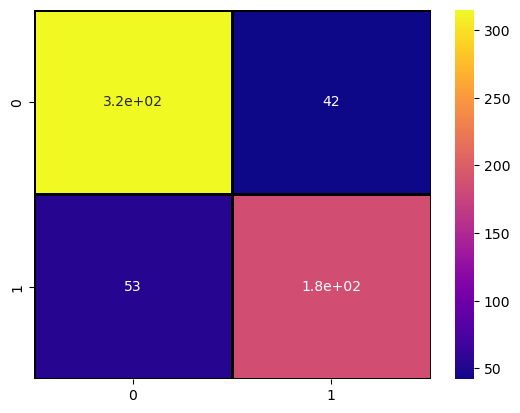

In [12]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_clf = DecisionTreeClassifier()
dec_tree_clf.fit(train_review_vectors, train_label.values.ravel())
predictions_dec_tree_clf = dec_tree_clf.predict(test_review_vectors)

print("Performance Evaluation of Decision Tree Algorithm:")
print("Confusion Matrix:\n", confusion_matrix(test_label, predictions_dec_tree_clf))

dec_tree_clf_acc = accuracy_score(test_label, predictions_dec_tree_clf) * 100.0

print("Accuracy:", dec_tree_clf_acc)

print("Classification Report:\n", 
      classification_report(test_label, predictions_dec_tree_clf, target_names=["NB", "B"]))
cm1 = confusion_matrix(test_label, predictions_dec_tree_clf)
sns.heatmap(cm1, annot=True, cmap='plasma',
            linecolor='black', linewidths=1)
plt.show()

Performance Evaluation of Random Forest (RF) Algorithm:
Confusion Matrix:
 [[321  36]
 [ 24 214]]
Accuracy: 89.91596638655463
Classification Report:
               precision    recall  f1-score   support

          NB       0.93      0.90      0.91       357
           B       0.86      0.90      0.88       238

    accuracy                           0.90       595
   macro avg       0.89      0.90      0.90       595
weighted avg       0.90      0.90      0.90       595



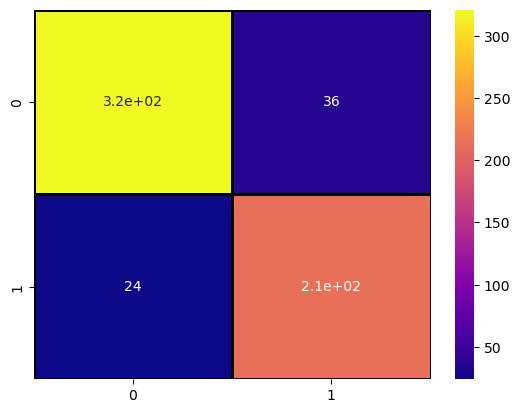

In [13]:
from sklearn.ensemble import RandomForestClassifier
rand_for_clf = RandomForestClassifier(n_estimators=200)
rand_for_clf.fit(train_review_vectors, train_label.values.ravel())
predictions_rand_for_clf = rand_for_clf.predict(test_review_vectors)
print("Performance Evaluation of Random Forest (RF) Algorithm:")
print("Confusion Matrix:\n", confusion_matrix(test_label, predictions_rand_for_clf))

rand_for_clf_acc = accuracy_score(test_label, predictions_rand_for_clf) * 100.0

print("Accuracy:", rand_for_clf_acc)

print("Classification Report:\n", 
      classification_report(test_label, predictions_rand_for_clf, target_names=["NB", "B"]))
cm1 = confusion_matrix(test_label, predictions_rand_for_clf)
sns.heatmap(cm1, annot=True, cmap='plasma',
            linecolor='black', linewidths=1)
plt.show()

Performance Evaluation of XGBOOST Algorithm:
Confusion Matrix:
 [[318  39]
 [ 33 205]]
Accuracy: 87.89915966386555
Classification Report:
               precision    recall  f1-score   support

          NB       0.91      0.89      0.90       357
           B       0.84      0.86      0.85       238

    accuracy                           0.88       595
   macro avg       0.87      0.88      0.87       595
weighted avg       0.88      0.88      0.88       595



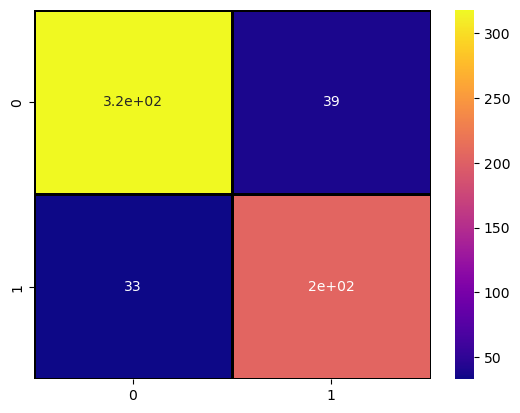

In [14]:
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(train_review_vectors, train_label.values.ravel())
predictions_rand_for_clf = my_model.predict(test_review_vectors)
print("Performance Evaluation of XGBOOST Algorithm:")
print("Confusion Matrix:\n", confusion_matrix(test_label, predictions_rand_for_clf))

randXGB_for_clf_acc = accuracy_score(test_label, predictions_rand_for_clf) * 100.0

print("Accuracy:", randXGB_for_clf_acc)

print("Classification Report:\n", 
      classification_report(test_label, predictions_rand_for_clf, target_names=["NB", "B"]))
cm1 = confusion_matrix(test_label, predictions_rand_for_clf)
sns.heatmap(cm1, annot=True, cmap='plasma',
            linecolor='black', linewidths=1)
plt.show()


Overall Accuracy of all classification algorithms:



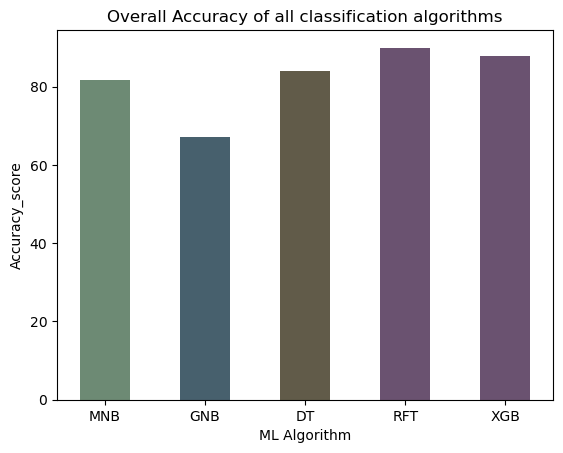

In [15]:
# Combining all algorithm accuracies in one table.
all_algos_result = {
    'Multinomial NB Accuracy': multi_nb_clf_acc,
    'Gaussian NB Accuracy': gau_nb_clf_acc,
    'Decision Tree Accuracy': dec_tree_clf_acc,
    'Random Forest Accuracy': rand_for_clf_acc,
    'Xgboost Forest Accuracy': randXGB_for_clf_acc
}
print("Overall Accuracy of all classification algorithms:\n")
all_algos_result

# Display bar chart
plt.bar(['MNB'], [multi_nb_clf_acc], color="#6d8a74", width=0.5)
plt.bar(['GNB'], [gau_nb_clf_acc], color="#47606d", width=0.5)
plt.bar(['DT'], [dec_tree_clf_acc], color="#615b49", width=0.5)
plt.bar(['RFT'], [rand_for_clf_acc], color="#6a5270", width=0.5)
plt.bar(['XGB'], [randXGB_for_clf_acc], color="#6a5270", width=0.5)

plt.xlabel("ML Algorithm")
plt.ylabel("Accuracy_score")
plt.title("Overall Accuracy of all classification algorithms")
plt.show()

In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pickle

pickle.dump(df,open('df.pkl','wb'))

In [19]:
df

,Comments,Classes
0,123A commodity we trade is beet pulp so I aske...,NB
1,NaN,NB
2,A never opens all the way until he she is comp...,NB
3,A porn star who thinks she is better than an e...,NB
4,about and how sweet she is to every single per...,NB
...,...,...
1995,She was already linked. She doesn't care.,NB
1996,It seems that she doesn't care about facts.,NB
1997,That girl is hideous in every way.,B
1998,"I appreciate you bringing good content to me, ...",NB
